# The evolution of Trust using pairwise immitation update

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

%matplotlib inline

In [2]:
import egttools as egt

In [3]:
from egttools.plotting.simplified import plot_replicator_dynamics_in_simplex

## Part 1: Infinite populations

In [4]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.Detective()]

In [5]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [6]:
A = np.array([
    [0, 3],
    [-1, 2]
])

In [7]:
nb_rounds = 5

In [8]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [9]:
game.expected_payoffs()

array([[ 2. , -1. ,  0.8],
       [ 3. ,  0. ,  1.8],
       [ 2.4, -0.6,  1.6]])

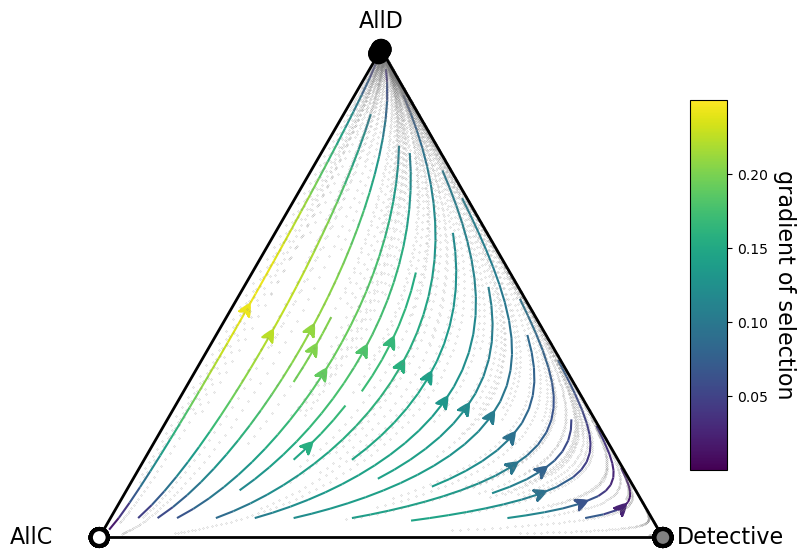

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradients, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(game.expected_payoffs(), ax=ax)

plot = (simplex.draw_triangle()
           .draw_gradients(density=1)
           .add_colorbar(label='gradient of selection')
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.12)
           .draw_stationary_points(roots_xy, stability)
#            .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 
#                                        roots,
#                                        stability,
#                                        trajectory_length=30,
#                                        linewidth=0.1,
#                                        step=0.01,
#                                        color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 100, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

In [11]:
nb_rounds = 100

In [12]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [13]:
game.expected_payoffs()

array([[ 2.  , -1.  ,  1.97],
       [ 3.  ,  0.  ,  0.09],
       [ 2.01, -0.03,  1.98]])

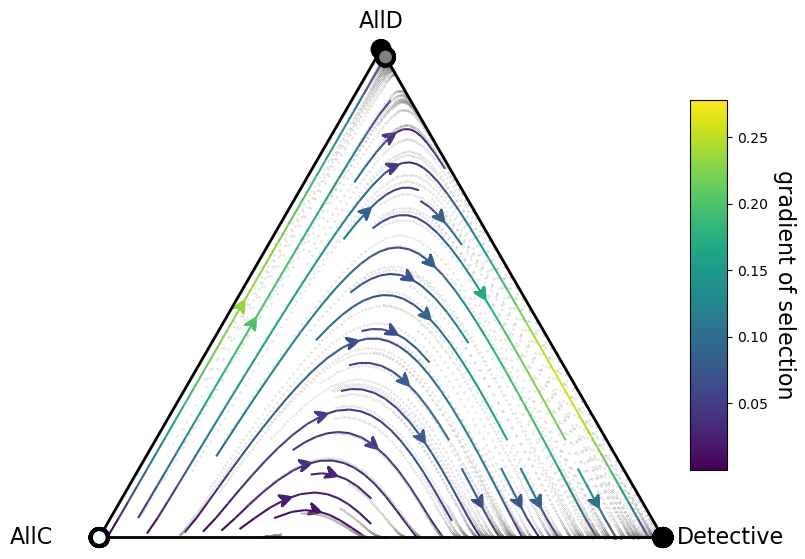

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradients, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(game.expected_payoffs(), ax=ax)

plot = (simplex.draw_triangle()
           .draw_gradients(density=1)
           .add_colorbar(label='gradient of selection')
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.12)
           .draw_stationary_points(roots_xy, stability)
#            .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 
#                                        roots,
#                                        stability,
#                                        trajectory_length=50,
#                                         linewidth=0.1,
#                                        step=0.01,
#                                        color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, game.expected_payoffs()), 100, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

## Part 2: small mutation limit

In [15]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.TFT(), 
              egt.behaviors.NormalForm.TwoActions.GRIM(), 
              egt.behaviors.NormalForm.TwoActions.Detective()]

In [16]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [17]:
nb_rounds = 100

In [18]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [19]:
game.expected_payoffs()

array([[ 2.  , -1.  ,  2.  ,  2.  , -0.91],
       [ 3.  ,  0.  ,  0.03,  0.03,  0.09],
       [ 2.  , -0.01,  2.  ,  2.  ,  1.98],
       [ 2.  , -0.01,  2.  ,  2.  ,  0.07],
       [ 2.97, -0.03,  1.98,  0.03,  1.98]])

### Part 2.1: Effect of $\beta$

In [20]:
Z = 100
beta = 0.1

evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [21]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

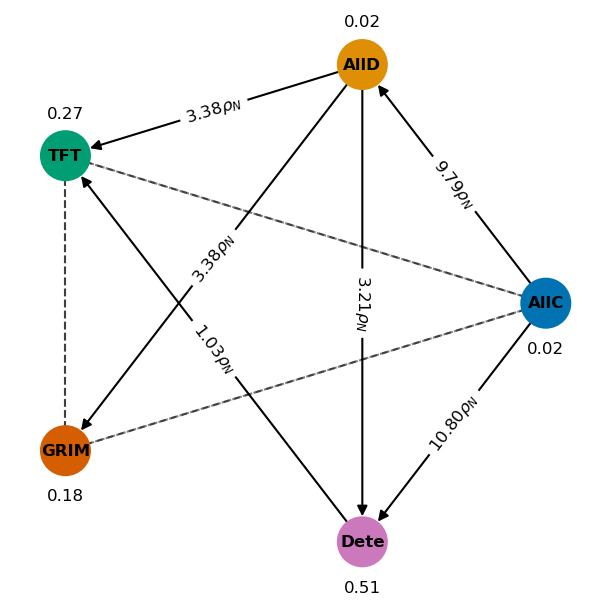

In [22]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

In [23]:
Z = 100
beta = 10

evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [24]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

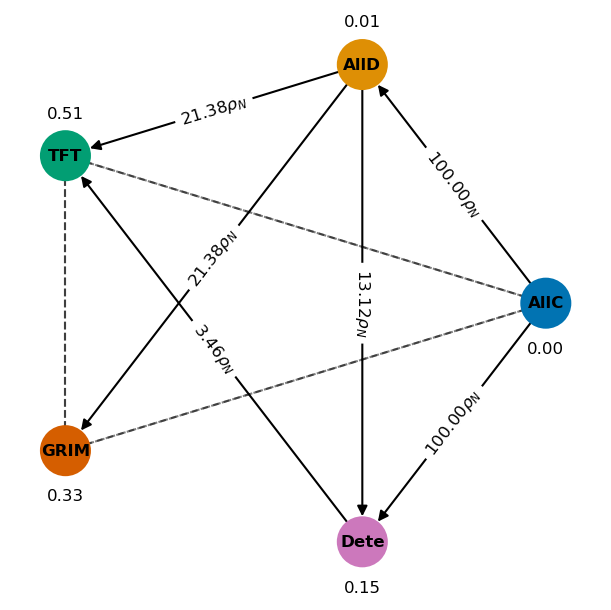

In [25]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

### Part 2.2 Effect of $Z$

In [26]:
Z = 30
beta = 10

evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [27]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

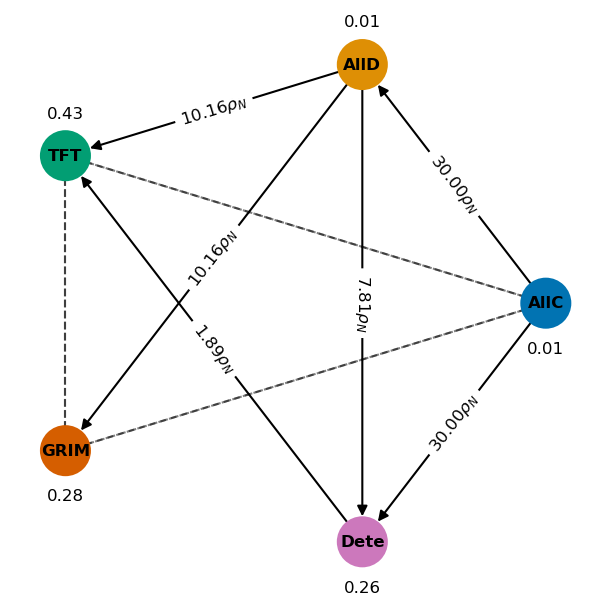

In [28]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

In [29]:
Z = 50
beta = 10

evolver = egt.analytical.StochDynamics(len(strategies), game.expected_payoffs(), Z)

In [30]:
transition_matrix,fixation_probabilities = evolver.transition_and_fixation_matrix(beta)
stationary_distribution = egt.utils.calculate_stationary_distribution(transition_matrix)

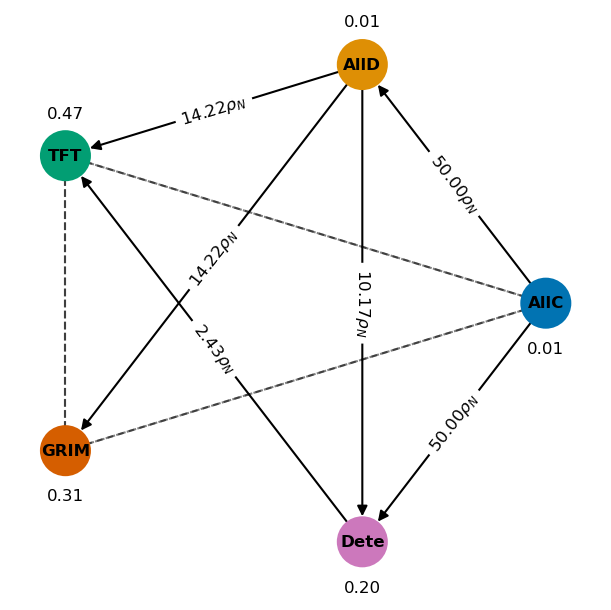

In [31]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = egt.plotting.draw_stationary_distribution(strategy_labels,
                                              1/Z, fixation_probabilities, stationary_distribution,
                                              node_size=600, 
                                              font_size_node_labels=8,
                                              font_size_edge_labels=8,
                                              font_size_sd_labels=8,
                                              edge_width=1,
                                              min_strategy_frequency=-0.01, 
                                              ax=ax)
plt.axis('off')
plt.show() # display

### Part 2.3: Which strategy(s) are dominant

TFT (or copycat) is the only dominant strategy, since it is the only one which is never invaded by any other strategy

## Part 3: Monte Carlo simulations

In [32]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector()]

In [33]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [34]:
Z = 50
beta = 1
mu = 1e-3
transitory = 1000
nb_generations = 1000000
nb_runs = 10

In [35]:
evolver = egt.numerical.PairwiseMoran(Z, game, 100000)

In [36]:
sd = evolver.estimate_stationary_distribution_sparse(nb_runs, nb_generations, transitory, beta, mu)

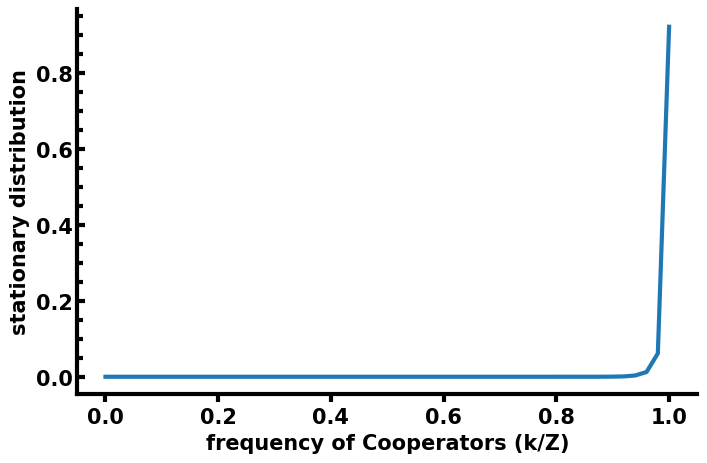

In [37]:
sns.set_context("notebook", rc={"lines.linewidth": 3, "axes.linewidth": 3})

fix, ax = plt.subplots(figsize=(8, 5))

ax.plot(np.arange(0, Z+1)/Z, sd.toarray()[0])
ax.set_ylabel('stationary distribution', fontsize=15, fontweight='bold')
ax.set_xlabel('frequency of Cooperators (k/Z)', fontsize=15, fontweight='bold')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', which='both', labelsize=15, width=3)
ax.tick_params(axis='y', which='both', direction='in', labelsize=15, width=3)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

sns.despine()

In [38]:
from egttools.plotting import Simplex2D

In [39]:
strategies = [egt.behaviors.NormalForm.TwoActions.Cooperator(), 
              egt.behaviors.NormalForm.TwoActions.Defector(), 
              egt.behaviors.NormalForm.TwoActions.Detective()]

In [40]:
strategy_labels = [strategy.type().replace("NFGStrategies::", '') for strategy in strategies]

In [41]:
game = egt.games.NormalFormGame(nb_rounds, A, strategies)

In [42]:
mu=1/Z

In [43]:
analytical_evolver = egt.analytical.StochDynamics(3, game.expected_payoffs(), Z, mu=mu)
sd_analytical = analytical_evolver.calculate_stationary_distribution(beta)

In [44]:
evolver = egt.numerical.PairwiseMoran(Z, game, 100000)
sd_estimated = evolver.estimate_stationary_distribution_sparse(nb_runs, 10000000, transitory, beta, mu).toarray()[0,:]

(-0.02, 0.9160254037844386)

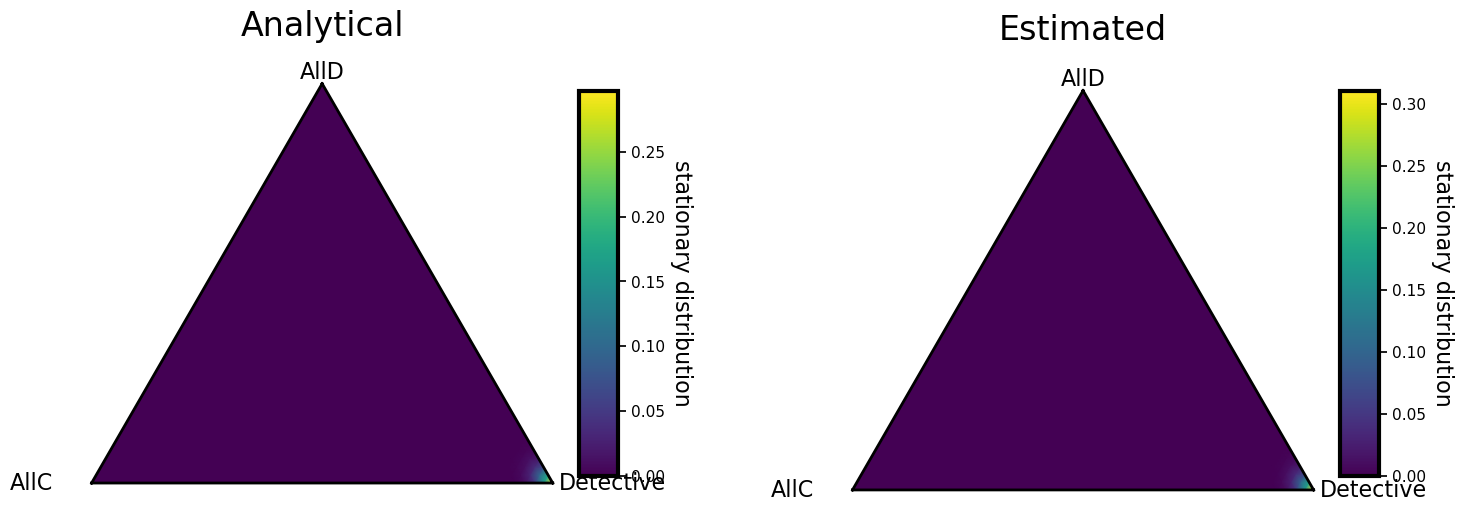

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(18,10))


plot = (Simplex2D(discrete=True, size=Z, nb_points=Z+1).add_axis(ax=axes[0])
           .draw_triangle()
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.13, epsilon_top=0.03)
           .draw_stationary_distribution(sd_analytical, alpha=1, shrink=0.5,
                                         edgecolors='gray', cmap='viridis', shading='gouraud', zorder=0)
          )

axes[0].set_title("Analytical", pad=20, fontsize=24)
axes[0].axis('off')
axes[0].set_aspect('equal')

plot = (Simplex2D(discrete=True, size=Z, nb_points=Z+1).add_axis(ax=axes[1])
           .draw_triangle()
           .add_vertex_labels(strategy_labels, epsilon_bottom=0.13, epsilon_top=0.03)
           .draw_stationary_distribution(sd_estimated, alpha=1, shrink=0.5,
                                         edgecolors='gray', cmap='viridis', shading='gouraud', zorder=0)
          )

axes[1].set_title("Estimated", pad=20, fontsize=24)
axes[1].axis('off')
axes[1].set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))

## How does the evolutionary process look like?

In [46]:
nb_states = egt.calculate_nb_states(Z, 3)

In [62]:
initial_state = egt.sample_simplex(np.random.randint(0, nb_states), Z, 3)

In [64]:
evolution_run = evolver.run(10000, beta, initial_state)

In [65]:
colors = sns.color_palette("viridis", 3)

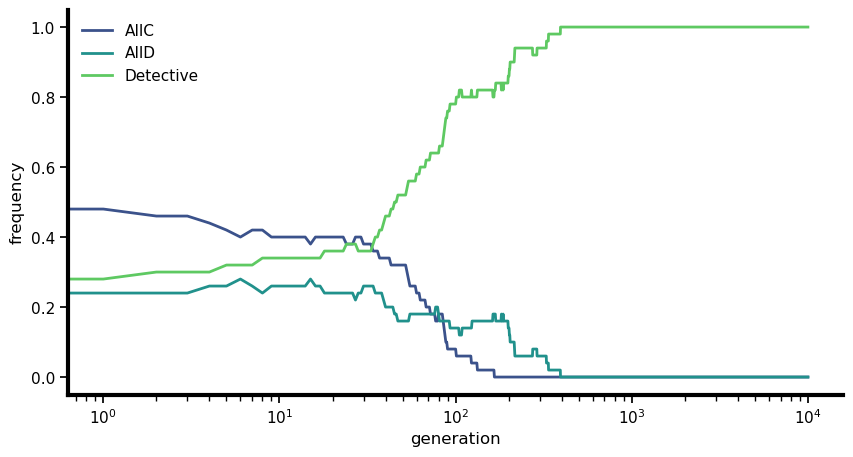

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, color in enumerate(colors):
    ax.plot(evolution_run[:, i]/Z, color=color, lw=2)
    
ax.legend(strategy_labels, frameon=False)

ax.set_ylabel('frequency')
ax.set_xlabel('generation')
ax.set_xscale('log')
sns.despine()

In [72]:
nb_runs = 10
nb_generations = 10000

runs_results = []

for _ in range(nb_runs):
    initial_state = egt.sample_simplex(np.random.randint(0, nb_states), Z, 3)
    runs_results.append(evolver.run(nb_generations, beta, initial_state))

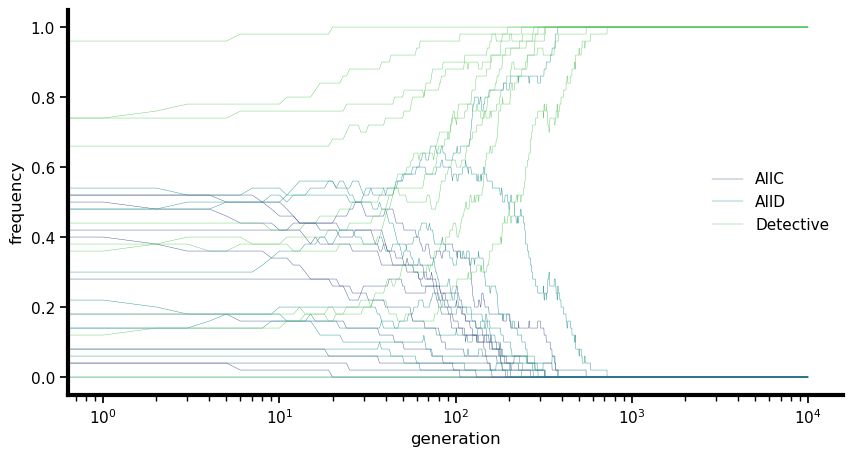

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))

for result in runs_results:
    for i, color in enumerate(colors):
        ax.plot(result[:, i]/Z, color=color, lw=0.3)
    
ax.legend(strategy_labels, frameon=False)

ax.set_ylabel('frequency')
ax.set_xlabel('generation')
ax.set_xscale('log')
sns.despine()

## Now what happens if the interactions occur in complex networks?

Algorithm:

1. Each player is playing an Iterated Prisoner's Dilemma with each of their neighbours (same payoff matrix as at the begginning of the notebook), playing the same strategy with each one of them. The total payoff is calculated as a sum of the payoffs received from playing all the games.  

2. Initially consider only 3 strategies, e.g., AllD, AllC, Detective.

3. The update mechanism is imitation: in each round (synchronously), each individual i chooses randomly a neighbour j and with probability $p_{ij}=(1+e^{\beta*(\Pi_{i} - \Pi_{j})})^{-1}$ they change their strategy to that of the neighbour

4. Updates are made syncrhonously: you need to keep 2 networks, one for the updated network and one for the old network. Iterate over all nodes and produce the desired update.

4. Let's consider 3 types of networks: complete, regular and scale-free. Assume for the regular and scale-free and avg. connectivity of 4 and a population size of 60 individuals (this is very small!).

5. Place 20 individuals of each of the 3 strategies randomly in the graph.

6. Plot frequency of each strategy over time in function of the Network and number of nodes 

In [74]:
import networkx as nx

In [75]:
Z = 50
k_mean = 4

In [91]:
G_sf = nx.barabasi_albert_graph(Z, k_mean)
G_regular = nx.random_regular_graph(k_mean, Z)

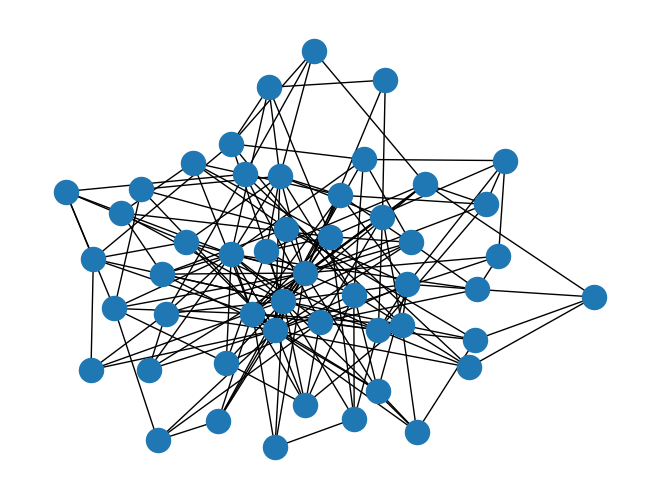

In [92]:
nx.draw(G_sf)
plt.show()

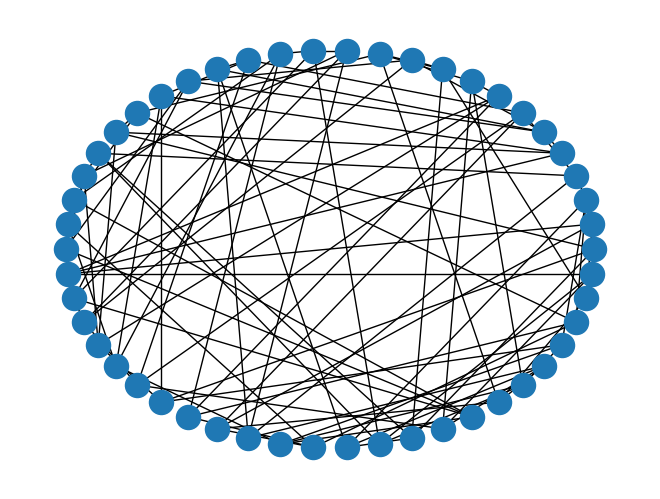

In [96]:
nx.draw(G_regular, pos=nx.circular_layout(G_regular))
plt.show()

In [189]:
def fermi(beta, payoff_a, payoff_b):
    return 1./(1+np.exp(beta * (payoff_a - payoff_b)))

In [198]:
def simulate_evolution_on_graph(graph, population_size, nb_generations):
    """
    Population size must be a multiple of 2
    """

    # First let's generate an array with 20 individuals of the 3 types (so 60 individuals in total)
    population = [0, 1] * (population_size // 2)
    
    # Then we reshufle so that there is a random ordering
    for _ in range(5):
        np.random.shuffle(population)
        
    population_next = population.copy()
    
    payoffs = {i: 0 for i in range(population_size)}
    
    cooperation_rate = np.zeros((nb_generations + 1,))
    
    for i in range(nb_generations + 1):
        cooperation_rate[i] = np.sum(population)
        # calculate payoffs
        for i in range(Z):
            payoffs[i] = 0
            for neighbour in G_sf[i].keys():
                payoffs[i] += A[population[0], population[neighbour]]
        
        # update
        for i in range(Z):
            neighbours = list(G_sf[0].keys())
            birth = np.random.choice(neighbours)
            if np.random.rand() < fermi(beta, payoffs[i], payoffs[birth]):
                population_next[i] = population[birth]
        
        population[:] = population_next[:]
        cooperation_rate[i]
    return cooperation_rate

In [199]:
cr = simulate_evolution_on_graph(G_sf, Z, 10000)

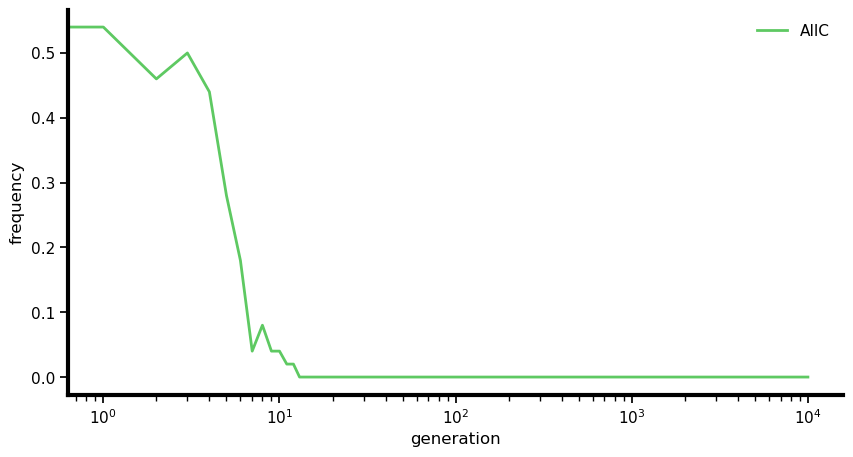

In [200]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(cr/Z, color=color, lw=2)
    
ax.legend(strategy_labels, frameon=False)

ax.set_ylabel('frequency')
ax.set_xlabel('generation')
ax.set_xscale('log')
sns.despine()